# Tugas Besar 1D - Pembelajaran Mesin


#### Anggota Kelompok
1. Ahmad Mutawalli - 13517026, K02
2. Harry Rahmadi Munly - 13517033, K03
3. Ardysatrio Fakhri Haroen - 13517062, K02
4. Dandi Agus Maulana - 13517077, K02

## A. Import Dependencies and Load Data

In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

import os
import sys
import joblib

from dtl.myC45 import Tree as MyC45
from mlp.MyMLP import Network as MyMLP

import warnings
warnings.filterwarnings('ignore')

from __future__ import print_function

In [14]:
#Load dataset
X_iris, y_iris = load_iris(return_X_y=True)
iris_data = pd.DataFrame(X_iris, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width']); iris_data['label'] = y_iris
iris_data = iris_data.sample(frac=1)
X_iris = iris_data.drop('label', axis=1)
y_iris = iris_data['label']
iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width,label
79,5.7,2.6,3.5,1.0,1
76,6.8,2.8,4.8,1.4,1
113,5.7,2.5,5.0,2.0,2
41,4.5,2.3,1.3,0.3,0
54,6.5,2.8,4.6,1.5,1


## B. Define Functions and Procedures

In [15]:
#mencetak confusion matrix dengan layout yang mudah dilihat
def print_confusion_matrix(y_test, pred_result):
    cm = confusion_matrix(y_test, pred_result)
    cm = pd.DataFrame(cm, index=[i for i in range(3)], columns=[i for i in range(3)])
    sns.heatmap(cm, annot=True)
    plt.show()
    
#menghitung skor akurasi     
def accuracy_score(target, pred):
    sums = 0
    for i in range(len(pred)):
        if(pred[i] == target[i]):
           sums += 1
    return float(sums)/float(len(pred))

#Membagi data dengan cross-validation
def split_data_crossval(X, y, n_split=10):
    #Splitting data: KFold Cross Validation Indexing
    kfold = KFold(n_splits=n_split)
    split = kfold.split(X, y)

    train_indexes = []
    test_indexes = []
    for train, test in split:
        train_indexes.append(train)
        test_indexes.append(test)
    
    return train_indexes, test_indexes 

#melakukan iterasi k-fold cross validation
def cross_validate(X, y, model_name):
    
    #get train and test indexes
    train_indexes, test_indexes = split_data_crossval(X, y)

    scores = []
    #for each indexes in train_idx, train and test the model on it
    for train_idx, test_idx in zip(train_indexes, test_indexes):
        X_train = X[train_idx]; y_train = y[train_idx]
        X_test = X[test_idx]; y_test = y[test_idx]
        
        if(model_name == 'c45'):
            #train model
            train_data = pd.DataFrame(X_train, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
            train_data['label'] = pd.Series(y_train)
            
            test_data = pd.DataFrame(X_test, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
            test_data['label'] = pd.Series(y_test)
                        
            clf = MyC45(train_data, 'label')
            clf.make_tree()
            
            #get result
            pred_result = clf.predict(pd.DataFrame(test_data))
            #get accuracy
            scores.append(accuracy_score(pred_result, y_test))
            
        elif(model_name == 'mlp'):
            #train model
            net = MyMLP(4, 4)
            net.fit(X_train, y_train, epoch_limit=100)
            
            #get result
            pred_result = net.predict(X_test)
            #get accuracy
            scores.append(accuracy_score(pred_result, y_test))
            
    #return list of cross val scores
    return scores
               


## C. Train Test Split and Confusion Matrix

### C.1. Model C4.5

-------predict-------
Prediction with C4.5
Prediction Accuracy: 100.0%
CONFUSION MATRIX (Row:True, Column:Prediction)


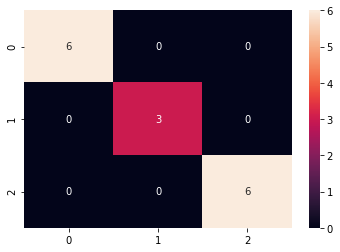

In [27]:
#split data
X_train, X_test, y_train, y_test = train_test_split(X_iris, y_iris, test_size=0.1, random_state=42)

#train model
train_data = pd.DataFrame(X_train, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
train_data['label'] = pd.Series(y_train)
            
test_data = pd.DataFrame(X_test, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
test_data['label'] = pd.Series(y_test)

clf = MyC45(train_data, 'label')
root_iris = clf.make_tree()

#get result
pred_result = clf.predict(pd.DataFrame(test_data))

#print Accuracy
print("Prediction with C4.5")
print("Prediction Accuracy: ", accuracy_score(y_test.values, pred_result) * 100 , "%", sep='')

#print confusion matrix
print("CONFUSION MATRIX (Row:True, Column:Prediction)")
print_confusion_matrix(y_test, pred_result)

### C.2. Model MLP

Prediction with MLP
Prediction Accuracy: 60.0%
CONFUSION MATRIX (Row:True, Column:Prediction)


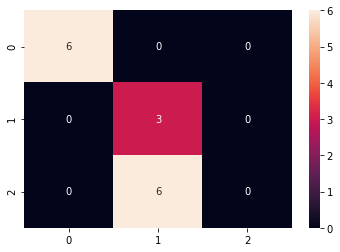

In [17]:
#split data
X_train, X_test, y_train, y_test = train_test_split(X_iris, y_iris, test_size=0.1, random_state=42)

#train model
net = MyMLP(4, 4)
net.fit(X_train.values, y_train.values, epoch_limit=100)

#get result
pred_result = net.predict(X_test.values)

#print Accuracy
print("Prediction with MLP")
print("Prediction Accuracy: ", accuracy_score(y_test.values, pred_result) * 100 , "%", sep='')

#print confusion matrix
print("CONFUSION MATRIX (Row:True, Column:Prediction)")
print_confusion_matrix(y_test, pred_result)

## D. 10-fold Cross Validation

### D.1. Model C4.5

In [25]:
c45_score = cross_validate(X_iris.values, y_iris.values, 'c45')
print("Average From 10-fold Cross Validation with C4.5:", np.mean(np.array(c45_score)))

-------predict-------
-------predict-------
-------predict-------
-------predict-------
-------predict-------
-------predict-------
-------predict-------
-------predict-------
-------predict-------
-------predict-------
Average From 10-fold Cross Validation with C4.5: 0.9466666666666667


### D.2. Model MLP

In [19]:
mlp_score = cross_validate(X_iris.values, y_iris.values, 'mlp')
print("Average From 10-fold Cross Validation with MLP:", np.mean(np.array(mlp_score)))

Average From 10-fold Cross Validation with MLP: 0.9800000000000001


## E. Export and Import Model


### E.1. C4.5

#### E.1.A. Export C4.5

In [36]:
def get_model_myC45(node, depth, space, array):
    if (depth == 0):
        dash = ''
    else:
        dash = ('--'*space)*depth + node.parent_value + ' '
        
    if(node.is_leaf):
        output = dash + '{' + str(node.leaf_value) + '}'
    else:
        output = dash + '[' + node.split_attr + ']' 
    
    array.append(output)
    
    depth += 1
    for child in node.childs:
        get_model_myC45(child, depth, space, array)
        
# export file
def export_tree(filename, tipe):
    model = []
    if(tipe=="C45"):
        get_model_myC45(root_iris, 0, 2, model)
        
    text_file = open(filename, "w")
    for L in model:
        text_file.write(L+"\n")
    text_file.close()
    
export_tree("tree_C45.txt", "C45")

#### E.1.B. Import C4.5

### E.2. MLP

#### E.2.A. Export MLP

In [22]:
#Train Model
clf = MyMLP(4, 4)
clf.fit(X_iris.values, y_iris.values, epoch_limit=100)

#show weights
clf.print_w_ItoH()
clf.print_w_HtoO()

#Save model
filename = 'mlp_model.sav'
joblib.dump(clf, filename)

          Hidden0   Hidden1   Hidden2   Hidden3
WInput0 -0.586721  0.649133 -0.119961  0.630740
WInput1 -0.605285  0.778865 -0.664834  1.798138
WInput2  0.095416 -0.343622 -0.899432 -1.613868
WInput3 -0.652099  0.955898  0.008259 -1.799642
WInput4 -0.877906 -0.328951 -0.739699 -0.276690
           Output0   Output1   Output2
WHidden0 -0.814972  0.951839  0.800460
WHidden1 -2.404492 -0.201067  0.342303
WHidden2  0.341032  0.231238 -0.012775
WHidden3  6.477397 -1.074995 -6.254495
WHidden4 -2.051648 -0.147493  0.584832


['mlp_model.sav']

#### E.2.B. Import MLP

In [23]:
loaded_clf = joblib.load(filename)
loaded_clf.print_w_ItoH()
loaded_clf.print_w_HtoO()

          Hidden0   Hidden1   Hidden2   Hidden3
WInput0 -0.586721  0.649133 -0.119961  0.630740
WInput1 -0.605285  0.778865 -0.664834  1.798138
WInput2  0.095416 -0.343622 -0.899432 -1.613868
WInput3 -0.652099  0.955898  0.008259 -1.799642
WInput4 -0.877906 -0.328951 -0.739699 -0.276690
           Output0   Output1   Output2
WHidden0 -0.814972  0.951839  0.800460
WHidden1 -2.404492 -0.201067  0.342303
WHidden2  0.341032  0.231238 -0.012775
WHidden3  6.477397 -1.074995 -6.254495
WHidden4 -2.051648 -0.147493  0.584832


Karena weight sama persis, export dan import model telah berhasil 

## F. Klasifikasi Instance Baru

### F.1. Dengan C4.5

### F.2. Dengan MLP

In [24]:
instance_pred = loaded_clf.predict(np.array([[5.5, 4.2, 5.7, 1.5]]))
print("Hasil Kelas Prediksi:", int(instance_pred[0]))

Hasil Kelas Prediksi: 2


## G. Analisis Hasil Eksperimen

### G.1. Analisis Eksperimen Dengan Train Test Split

Prediction with C4.5
Prediction Accuracy: 100.0%
CONFUSION MATRIX (Row:True, Column:Prediction)


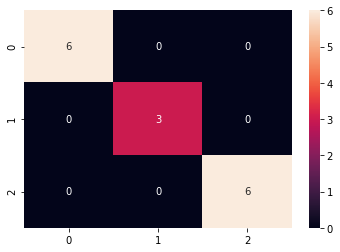

In [39]:
#print Accuracy
print("Prediction with C4.5")
print("Prediction Accuracy: ", accuracy_score(y_test.values, pred_result) * 100 , "%", sep='')

#print confusion matrix
print("CONFUSION MATRIX (Row:True, Column:Prediction)")
print_confusion_matrix(y_test, pred_result)

Prediction with MLP
Prediction Accuracy: 100.0%
CONFUSION MATRIX (Row:True, Column:Prediction)


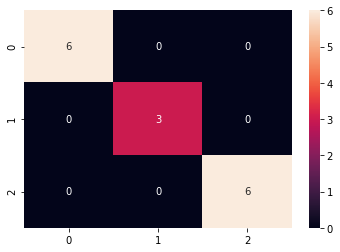

In [40]:
#print Accuracy
print("Prediction with MLP")
print("Prediction Accuracy: ", accuracy_score(y_test.values, pred_result) * 100 , "%", sep='')

#print confusion matrix
print("CONFUSION MATRIX (Row:True, Column:Prediction)")
print_confusion_matrix(y_test, pred_result)

Dapat dilihat dari hasil eksperimen bahwa secara keseluruhan, skor akurasi model C4.5 sama dengan skor akurasi model MLP, yakni 93.33% (hanya salah mengklasifikasikan 1 contoh). Namun ada perbedaan pada model yang dapat dilihat melalui confusion matrix yang dihasilkan, yakni:

1. Model C4.5 menghasilkan satu buah false positive terhadap kelas 1, yang merupakan juga false negative terhadap kelas 2. Ini artinya model mempunyai kecenderungan untuk kurang bisa memprediksi instances yang merupakan anggota kelas 2 dan mempunyai kecenderungan untuk memprediksi bahwa suatu instance merupakan anggota kelas 1

2. Model MLP menghasilkan satu buah false positive terhadap kelas 2, yang merupakan juga false negative terhadap kelas 1. Ini artinya model mempunyai kecenderungan untuk kurang bisa memprediksi instances yang merupakan anggota kelas 1 dan mempunyai kecenderungan untuk memprediksi bahwa suatu instance merupakan anggota kelas 2



### G.2. Analisis Eksperimen Dengan 10-fold Corss Validation

In [41]:
print("Hasil yang didapat dengan C4.5")
print("Average From 10-fold Cross Validation with C4.5:", np.mean(np.array(c45_score)))

Hasil yang didapat dengan C4.5
Average From 10-fold Cross Validation with C4.5: 0.9466666666666667


In [42]:
print("Hasil yang didapat dengan MLP")
print("Average From 10-fold Cross Validation with MLP:", np.mean(np.array(mlp_score)))

Hasil yang didapat dengan MLP
Average From 10-fold Cross Validation with MLP: 0.9800000000000001


Yang tercetak adalah rata-rata akurasi dari 10 kali (10 folds) training dan testing masing-masing model. Dapat dilihat bahwa rata-rata akurasi C4.5 lebih tinggi dibandingkan dengan MLP. Dari hasil ini dapat disimpulkan bahwa pada MLP lebih rentan terjadi overfitting dibandingkan pada C4.5, walaupun bila dilakukan eksperimen dengan train test split akurasi keduanya sama. Penulis mengira salah satu alasan MLP lebih rentan terhadap overfitting adalah konfigurasi parameternya, yaitu parameter epoch. Jika nilai epoch lebih dari optimal, maka akan membuat model rentan terhadap overfitting, karena model terus mengubah weight sesuai dengan data training dan mengurangi kemampuan untuk menggeneralisir.

### G.3. Analisis Perbandingan Model